### Importing the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Creating a dataframe using the CSV file
df = pd.read_csv("Ecommerce Sales Data.csv")

In [4]:
# Printing the data frame created
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [5]:
# This code makes the visibiity of all the columns in the Data frame
pd.set_option("display.max_columns", 45)

In [6]:
# Showing the first five entries of the dataframe
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [7]:
# Showing the lastt five entries of the dataframe
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [8]:
# Printing the shape that is the number of rows ad columns in the dataframe in the form of tuple
df.shape

(128975, 24)

In [9]:
# Printing the total number of data points in the data frame
df.size

3095400

In [10]:
# Printing the neccessary informations of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [11]:
# Printing the FIVE POINT SUMMARY of the numerical columnns of the datframe
# It provides detailed info on the Central tendecy and Dispersio of the data
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [12]:
# This line describes every column of the dataframe including categorical and numerical columns
df.describe(include= 'all')

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,128975.000000,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,128975.000000,121180,121180.000000,128942,128942,128942.000000,128942,79822,128975,39277,79925
unique,NaN,120378,91,13,2,2,2,1377,7195,9,11,7190,3,NaN,1,NaN,8955,69,NaN,1,5787,2,1,1
top,NaN,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,NaN,INR,NaN,BENGALURU,MAHARASHTRA,NaN,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
freq,NaN,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,NaN,121180,NaN,11217,22260,NaN,128942,46100,128104,39277,79925
mean,64487.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904431,NaN,648.561465,NaN,NaN,463966.236509,NaN,NaN,NaN,NaN,NaN
std,37232.019822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313354,NaN,281.211687,NaN,NaN,191476.764941,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,110001.000000,NaN,NaN,NaN,NaN,NaN
25%,32243.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,449.000000,NaN,NaN,382421.000000,NaN,NaN,NaN,NaN,NaN
50%,64487.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,605.000000,NaN,NaN,500033.000000,NaN,NaN,NaN,NaN,NaN
75%,96730.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,788.000000,NaN,NaN,600024.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
# Showing the name of all columns in the dataframe
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [14]:
# Checking whether there is missing values in the dataframe
# The data has some missing values in some of the columns
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [15]:
# This shows how many DUPLICATED rows present in the data frame
# There is no dulicates present in the Data.
df.duplicated().sum()

np.int64(0)

## Handling missing Values

### Courier Status - Missing values

In [16]:
# It shows the unique values in the column 
df['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [17]:
# It counts the number of unique values in the data
# The Value counts function does not include the NAN values
df['Courier Status'].value_counts()

Courier Status
Shipped      109487
Unshipped      6681
Cancelled      5935
Name: count, dtype: int64

In [18]:
# The percentage of the unique values in the data
df['Courier Status'].value_counts(normalize= True) *100

Courier Status
Shipped      89.66774
Unshipped     5.47161
Cancelled     4.86065
Name: proportion, dtype: float64

In [19]:
# This shows the number of NAN in the column
df['Courier Status'].isnull().sum()

np.int64(6872)

In [20]:
# Replacing the NAN with UNKNOWN
# We should not replace it with mode or any other means because the data is about sales revenue and potential errors will occur if we fill those NAN with mode.
df['Courier Status'] = df['Courier Status'].replace(np.nan, 'Unknown')

In [21]:
df['Courier Status'].unique()

array(['Unknown', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [22]:
# Missing values is filled 
df['Courier Status'].isnull().sum()

np.int64(0)

### Currency - Missing values

In [23]:
# Checking the null values in Cuurency column of data frame
df['currency'].isnull().sum()

np.int64(7795)

In [24]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [25]:
# Investigating whether the data has transactions outside INDIA
df["ship-country"].value_counts()

ship-country
IN    128942
Name: count, dtype: int64

In [26]:
# From the above we can say that transactions are made only in INDIA so we can fill the missing values IMR
df['currency'] = df['currency'].fillna('INR')

In [27]:
df['currency'].unique()

array(['INR'], dtype=object)

In [28]:
# Confirming the replacing the missing values is done properly
df['currency'].isnull().sum()

np.int64(0)

### Amount - Missing Values

In [29]:
# Shows the five point summary for the amount column
df['Amount'].describe().to_frame()

,Amount
count,121180.000000
mean,648.561465
std,281.211687
min,0.000000
25%,449.000000
50%,605.000000
75%,788.000000
max,5584.000000


In [30]:
# Checking the number of missing values in the amount column
df['Amount'].isnull().sum()

np.int64(7795)

In [31]:
# Checking the number of missing values in the amount column
df['Amount'].isna().value_counts()

Amount
False    121180
True       7795
Name: count, dtype: int64

In [32]:
# interpolate(method='linear') fills missing values by estimating their values based on the values of the surrounding data points.
df['Amount']= df['Amount'].interpolate(method='linear')

In [33]:
df['Amount'].isnull().sum()

np.int64(0)

In [34]:
# By the result we can see that the five point summary is not influenced much by interpolation method of missing values
df['Amount'].describe().to_frame()

,Amount
count,128975.000000
mean,648.562553
std,277.054023
min,0.000000
25%,453.000000
50%,612.000000
75%,788.000000
max,5584.000000


### Ship City , ship-city, ship-state, ship-postal-code   - Missing values

In [35]:
df['ship-city'].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [36]:
# Only 33 rows have missing values so dropping the rows with missing values
df = df.dropna(subset=['ship-city','ship-state','ship-postal-code'])

In [37]:
df['ship-city'].isnull().sum()

np.int64(0)

In [38]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         49145
B2B                       0
fulfilled-by          89678
Unnamed: 22           49037
dtype: int64

In [39]:
# More than one by third of the data is missing in the columns of promotion-ids,B2B,fulfilled-by,Unnamed: 22.
df.drop('promotion-ids',axis=1,inplace=True)

In [40]:
df.drop('fulfilled-by',axis=1,inplace=True)

In [41]:
df.drop('Unnamed: 22',axis=1,inplace=True)

In [42]:
# All missing Values are filled.
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

### Question:
`01. WHICH PRODUCT CATEGORY GENERATED THE HIGHEST REVENUE ACROSS ALL FULFILLMENT METHODS?`

In [43]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [44]:
# Grouping the data using category and aggregate sum of amount column 
df3= df.groupby('Category')['Amount'].sum().reset_index()

In [45]:
df3.sort_values(by='Amount',ascending=False).reset_index()

,index,Category,Amount
0,5,Set,4.130717e+07
1,8,kurta,2.333003e+07
2,7,Western Dress,1.174018e+07
3,6,Top,5.636283e+06
4,3,Ethnic Dress,8.343226e+05
5,0,Blouse,4.879201e+05
6,1,Bottom,1.620090e+05
7,4,Saree,1.296083e+05
8,2,Dupatta,9.150000e+02


In [46]:
# Sorting the column in descending order and printing the first entry
df3.sort_values(by='Amount', ascending=False).iloc[0]

Category                Set
Amount      41307173.485983
Name: 5, dtype: object

### <span style="color:yellow">Set category has generated the highest revenue across all methods</span>

### Question:
`02. FIND THE MOST COMMON SIZE OF PRODUCTS SOLD FOR EACH CATEGORY`

In [47]:
# A new DataFrame df4 is created where each row represents a unique Category and its corresponding most frequent Size.
df4 = df.groupby('Category')['Size'].apply(lambda x: x.mode()[0]).reset_index()

In [48]:
df4

,Category,Size
0,Blouse,Free
1,Bottom,S
2,Dupatta,Free
3,Ethnic Dress,XL
4,Saree,Free
5,Set,M
6,Top,XL
7,Western Dress,L
8,kurta,L


### <span style="color:Yellow"> The Above table shows the most common size for each category

### Question
`3. CALCULATE THE AVERAGE QUANTITY SOLD FOR "B2B" SALES IN EACH PRODUCT CATEGORY`

In [49]:
df[['B2B' , 'Qty' , 'Category']]

,B2B,Qty,Category
0,False,0,Set
1,False,1,kurta
2,True,1,kurta
3,False,0,Western Dress
4,False,1,Top
...,...,...,...
128970,False,1,kurta
128971,False,1,Set
128972,False,1,Western Dress
128973,False,1,Set


In [50]:
# Filtering data Where B2B is true and also showing the columns quantity category and B2B
B2b = pd.DataFrame(df[df['B2B'] == True][['Qty', 'Category','B2B']])

In [51]:
B2b

,Qty,Category,B2B
2,1,kurta,True
241,1,kurta,True
657,1,Top,True
859,1,kurta,True
860,1,kurta,True
...,...,...,...
127540,1,Set,True
128096,1,kurta,True
128265,1,Set,True
128478,1,Set,True


In [52]:
# Using Group by function to group the data by category and mean of the Qty sold in B2B sales
average_qty_per_category = B2b.groupby('Category')['Qty'].mean()

In [53]:
# Sorting the grouped data by quantty column 
average_qty_per_category.to_frame().sort_values(ascending=False,by='Qty')

,Qty
Category,
Blouse,1.000000
Saree,1.000000
Top,0.983607
Set,0.973529
kurta,0.960366
Western Dress,0.946903
Ethnic Dress,0.933333
Bottom,0.750000


### <span style="color:Yellow"> The Above table shows the __Average Quantity__ sold for B2B in each product category

### Question
`4. IDENTIFY THE TOP 3 DAYS WITH THE HIGHEST SALES AMOUNT.`


In [54]:
# Using groupby function to group the data by date and highest amount in that date
Highest_sales = df.groupby("Date")["Amount"].max().sort_values()

In [55]:
Highest_sales.to_frame().iloc[0:3]

,Amount
Date,
06-16-22,1473.0
06-01-22,1559.0
04-03-22,1576.0


### <span style="color:Yellow"> The top three days with highest sales are __06-16-22 , 64-01-22 , 04-03-22__ 

### Question
`5.FOR EACH "SKU," FIND THE CUMULATIVE QUANTITY SOLD OVER TIME`

In [56]:
# Using valiue counts to see unique values and their counts
df['SKU'].value_counts().to_frame()

,count
SKU,
JNE3797-KR-L,773
JNE3797-KR-M,656
JNE3797-KR-S,587
JNE3405-KR-L,535
J0230-SKD-M,507
...,...
JNE3663-TP-L,1
JNE3625-DR-XL,1
PJNE3439-KR-N-6XL,1


In [57]:
# Grouping the data by SKU and aggregate sum of AMOUNT
Sku = df.groupby('SKU')['Amount'].sum()

In [58]:
Sku.to_frame().sort_values(by = 'Amount', ascending= False).head(10)

,Amount
SKU,
JNE3797-KR-L,557144.125000
J0230-SKD-M,549881.703333
J0230-SKD-S,497060.451667
JNE3797-KR-M,476003.543333
JNE3797-KR-S,431115.820000
JNE3797-KR-XL,351353.911667
J0230-SKD-L,322669.803788
JNE3797-KR-XS,319822.796667
SET268-KR-NP-XL,294155.640000


### <span style="color:Yellow"> The above Table shows the top 10 __SKU__ which has produced more sales over the time period

### Question
`6. DETERMINE THE MOST SOLD PRODUCT STYLE BY QUANTITY FOR EACH FULFILLMENT METHOD.`

In [59]:
df['Style'].value_counts().to_frame()

,count
Style,
JNE3797,4223
JNE3405,2261
J0230,1867
SET268,1860
J0341,1630
...,...
SAR097,1
SET234,1
SET066,1


In [60]:
# fulfilment_method = df.groupby('Fulfilment')['Style'].apply(lambda x: x.nlargest(5))
fulfilment_method = (
    df.groupby('Fulfilment')['Style'].value_counts().groupby(level=0).nlargest(5).reset_index(name='Count', level=[1])  # Explicitly reset 'Style' as a column
)

In [61]:
fulfilment_method

Fulfilment  Count
Fulfilment Style                    
Amazon     JNE3405     Amazon   1860
           SET268      Amazon   1799
           J0230       Amazon   1616
           JNE3797     Amazon   1529
           JNE3373     Amazon   1110
Merchant   JNE3797   Merchant   2694
           J0003     Merchant    840
           J0341     Merchant    563
           JNE3798   Merchant    547
           JNE3800   Merchant    515

As the average of product sold for each category is almost one or less than one we could take the count as the number of products sold

### <span style="color:Yellow"> By that context , we could say that the number of products sold for each style is shown in the above table

### Question
`7. CALCULATE THE AVERAGE SALE AMOUNT FOR ORDERS FULFILLED BY "COURIER" WHERE THE COURIER STATUS IS "DELIVERED."`

In [62]:
# Replacing the unknown in the courier status as DELIVERED
df['Courier Status'].replace('Unknown',"Delivered",inplace = True)

In [63]:
# Filter the rows where courier_status is 'Delivered'
delivered_df = pd.DataFrame(df[df['Courier Status'] == 'Delivered'])

In [64]:
# Calculate the average of the 'Amount' column
average_amount = delivered_df['Amount'].mean()

print(f"The average amount for delivered couriers is: {round(average_amount,4)}")

The average amount for delivered couriers is: 628.661


### <span style="color:Yellow">  THE AVERAGE SALE AMOUNT FOR ORDERS STATUS IS "DELIVERED IS 628.661

### Question
`8. FIND THE MAXIMUM AMOUNT FROM ANY SINGLE SALE AND IDENTIFY THE ASSOCIATED "SKU" AND "CATEGORY." `

In [65]:
max_amount_single_sale = df['Amount'].max()

In [66]:
print(f"The maximum amount in single sale is {max_amount_single_sale}")

The maximum amount in single sale is 5584.0


In [67]:
# Filter rows where 'Amount' is 5584.0 and select 'SKU' and 'Category'
single_sale = pd.DataFrame(df[df['Amount'] == 5584.0][["Amount", 'SKU', 'Category']])

In [68]:
single_sale

,Amount,SKU,Category
42039,5584.0,SET268-KR-NP-XS,Set


### <span style="color:Yellow"> The Maximum amount from single sales is associated with __SKU__ Of <span style="color:white">__SET268-KR-NP-XS__</span> and __Category__ of <span style="color:white">__SET__</span>

### Question
`9. WHICH CATEGORY HAD THE MOST FREQUENT COURIER DELIVERY FAILURES?`


In [69]:
df['Status'].value_counts()

Status
Shipped                          77788
Shipped - Delivered to Buyer     28762
Cancelled                        18325
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [70]:
# Define failure statuses
failure_statuses = ['Shipped - Returned to Seller', 'Shipped - Rejected by Buyer', 
                    'Shipped - Lost in Transit', 'Shipped - Damaged']

# Filter the DataFrame for these statuses and group by 'Category'
failure_data = df[df['Status'].isin(failure_statuses)]

# Count the number of failures per category
failure_counts = failure_data['Category'].value_counts()

# Get the category with the most frequent delivery failures
most_frequent_failure_category = failure_counts.idxmax()
most_frequent_failure_count = failure_counts.max()

print(f"The category with the most frequent courier delivery failures is '{most_frequent_failure_category}' with {most_frequent_failure_count} failures.")


The category with the most frequent courier delivery failures is 'Set' with 772 failures.


### <span style="color:Yellow">The category with the most frequent courier delivery failures is  <span style="color:white">__SET__</span> with <span style="color:white">__772 Failures__</span>


### Question
`10. CREATE A PIVOT TABLE SHOWING THE TOTAL AMOUNT OF SALES FOR EACH "CATEGORY" AND "FULFILMENT" METHOD.`

In [71]:
# Create a pivot table to show the total sales amount for each 'Category' and 'Fulfilment'
pivot_table_sales = pd.DataFrame(df.pivot_table(values='Amount', index='Category', columns='Fulfilment', aggfunc='sum',sort=True))

In [72]:
# Display the pivot table
print(pivot_table_sales)

Fulfilment           Amazon      Merchant
Category                                 
Blouse         3.674579e+05  1.204622e+05
Bottom         9.334626e+04  6.866276e+04
Dupatta        9.150000e+02           NaN
Ethnic Dress   6.160540e+05  2.182686e+05
Saree          1.035110e+05  2.609726e+04
Set            2.930640e+07  1.200077e+07
Top            4.364948e+06  1.271335e+06
Western Dress  6.598610e+06  5.141570e+06
kurta          1.678523e+07  6.544795e+06


### <span style="color:Yellow"> A pivot table is created showing the total amount of sales for each category and fulfilment method

From the table the highest sales is in the category <span style = "color : yellow" > ***BLOUSE*** </span> and it is from the <span style = "color : 'yellow"> ***AMAZON*** </span>

#### Question
`11. IDENTIFY THE "ASIN" WITH THE HIGHEST NUMBER OF "B2B" ORDERS`

In [73]:
# Filter for B2B orders
b2b_data = df[df['B2B'] == True]


In [74]:
b2b_data

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
241,241,407-5766340-7411567,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3440,JNE3440-KR-N-XS,kurta,XS,B09HMY3YLT,Shipped,1,INR,399.0,AHMEDABAD,Gujarat,380022.0,IN,True
657,657,405-9201316-2870743,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0117,J0117-TP-XXL,Top,XXL,B08N4XHHCQ,Shipped,1,INR,518.0,MIHAN,MAHARASHTRA,441110.0,IN,True
859,859,407-6114533-2816312,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3722,JNE3722-KR-L,kurta,L,B09BQBB47Y,Shipped,1,INR,280.0,MADIKERI,KARNATAKA,571201.0,IN,True
860,860,407-6002733-2903540,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3480,JNE3480-KR-M,kurta,M,B099RJY1RY,Shipped,1,INR,249.0,MADIKERI,KARNATAKA,571201.0,IN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127540,127540,171-4817567-5756337,06-01-22,Shipped,Amazon,Amazon.in,Expedited,NW004,NW004-TP-PJ-XXXL,Set,3XL,B0922T745K,Shipped,1,INR,475.0,MUMBAI,MAHARASHTRA,400056.0,IN,True
128096,128096,404-3844302-4907559,06-01-22,Shipped,Amazon,Amazon.in,Expedited,JNE2171,JNE2171-KR-437-M,kurta,M,B079WX69ZM,Shipped,1,INR,524.0,PANCHKULA,HARYANA,134109.0,IN,True
128265,128265,171-4327993-8297158,06-01-22,Shipped,Amazon,Amazon.in,Expedited,J0349,J0349-SET-S,Set,S,B099NJ4XRB,Shipped,1,INR,845.0,GURUGRAM,HARYANA,122101.0,IN,True
128478,128478,406-2175029-9825118,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0379,J0379-SKD-XS,Set,XS,B09M6VPHJY,Shipped,1,INR,1369.0,NEW DELHI,DELHI,110045.0,IN,True


In [75]:
# Count the occurrences of each ASIN for B2B sales
asin_counts = b2b_data['ASIN'].value_counts()

In [76]:
asin_counts.to_frame()

,count
ASIN,
B09SDY68JK,8
B09SDXFFQ1,7
B09SDY4VDC,6
B09SDYQ3WG,5
B0983F3BLZ,5
...,...
B0965KHYNH,1
B09LD24932,1
B08QGNJ2FH,1


In [77]:

# # Identify the ASIN with the highest number of B2B orders
highest_asin = asin_counts.idxmax()
highest_asin_count = asin_counts.max()

print(f"The ASIN with the highest number of B2B orders is '{highest_asin}' with {highest_asin_count} orders.")

The ASIN with the highest number of B2B orders is 'B09SDY68JK' with 8 orders.


### <span style="color:Yellow">The ASIN with the highest number of B2B orders is  <span style="color:white">__'B09SDY68JK'__</span> with <span style="color:white">__with 8 orders.__</span>

### Question
`12. FIND THE PERCENTAGE OF PRODUCTS SOLD IN EACH CURRENCY.`


In [78]:
Currency = df['currency'].value_counts()

In [79]:
Currency_percent = (Currency / (len(df['currency']))) *100

In [80]:
Currency_percent

currency
INR    100.0
Name: count, dtype: float64

### <span style="color:Yellow">The data set contains only one kind of currency so all the products are ordered by the <span style="color:white">___INR___</span>

#### Question
`13. CALCULATE THE MOVING AVERAGE OF SALES AMOUNT OVER A 7-DAY WINDOW FOR EACH PRODUCT "SKU."`


In [81]:
df['Date'].unique()

array(['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22',
       '04-25-22', '04-24-22', '04-23-22', '04-22-22', '04-21-22',
       '04-20-22', '04-19-22', '04-18-22', '04-17-22', '04-16-22',
       '04-15-22', '04-14-22', '04-13-22', '04-12-22', '04-11-22',
       '04-10-22', '04-09-22', '04-08-22', '04-07-22', '04-06-22',
       '04-05-22', '04-04-22', '04-03-22', '04-02-22', '04-01-22',
       '03-31-22', '05-31-22', '05-30-22', '05-29-22', '05-28-22',
       '05-27-22', '05-26-22', '05-25-22', '05-24-22', '05-23-22',
       '05-22-22', '05-21-22', '05-20-22', '05-19-22', '05-18-22',
       '05-17-22', '05-16-22', '05-15-22', '05-14-22', '05-13-22',
       '05-12-22', '05-11-22', '05-10-22', '05-09-22', '05-08-22',
       '05-07-22', '05-06-22', '05-05-22', '05-04-22', '05-03-22',
       '05-02-22', '05-01-22', '06-29-22', '06-28-22', '06-27-22',
       '06-26-22', '06-25-22', '06-24-22', '06-23-22', '06-22-22',
       '06-21-22', '06-20-22', '06-19-22', '06-18-22', '06-17-

In [82]:
# Creating a list of dates of a week
A_weeks_date = ['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22','04-25-22', '04-24-22']

In [83]:
# Filter the DataFrame for the specified dates
A_week_df = df[df['Date'].isin(A_weeks_date)]

In [84]:
A_week_df['Date'].value_counts().to_frame()

,count
Date,
04-24-22,1810
04-30-22,1669
04-25-22,1664
04-26-22,1563
04-29-22,1464
04-27-22,1459
04-28-22,1416


In [85]:
# Calculate the average sales amount for the filtered dates
Avg_sales_by_date = A_week_df['Amount'].mean()

In [86]:
print(f"Average sales amount for the selected dates: {round(Avg_sales_by_date,4)}")

Average sales amount for the selected dates: 625.3623


### <span style="color:Yellow"> Average sales amount for the selected dates: __625.3623__

#### Question
`14. FIND THE TOTAL SALES AMOUNT FOR EACH DAY OF THE WEEK (MONDAY, TUESDAY, ETC.)`

In [87]:
# Convert the 'Date' column to datetime format if not already
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

In [88]:
# Extract the day of the week (e.g., Monday, Tuesday, etc.)
df['Day of Week'] = df['Date'].dt.day_name()

In [89]:
# Group by 'Day of Week' and sum the 'Amount'
total_sales_by_day = df.groupby('Day of Week')['Amount'].sum()

In [90]:
df['Day of Week'].to_frame()

,Day of Week
0,Saturday
1,Saturday
2,Saturday
3,Saturday
4,Saturday
...,...
128970,Tuesday
128971,Tuesday
128972,Tuesday
128973,Tuesday


In [91]:
# Display the results sorted by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_sales_by_day = total_sales_by_day.reindex(day_order)

In [92]:
print(total_sales_by_day.to_frame())

                   Amount
Day of Week              
Monday       1.204122e+07
Tuesday      1.225890e+07
Wednesday    1.200094e+07
Thursday     1.100768e+07
Friday       1.152888e+07
Saturday     1.202745e+07
Sunday       1.276338e+07


### <span style="color:Yellow"> THE TOTAL SALES AMOUNT FOR EACH DAY OF THE WEEK SHOWN ABOVE

#### Question
`15. WHICH "SKU" HAD THE HIGHEST AVERAGE SALE AMOUNT FOR B2B ORDERS?`

In [93]:
# Fitering the data set
b2b_df = df[df['B2B'] == True]

In [94]:
b2b_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Day of Week
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Saturday
241,241,407-5766340-7411567,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3440,JNE3440-KR-N-XS,kurta,XS,B09HMY3YLT,Shipped,1,INR,399.0,AHMEDABAD,Gujarat,380022.0,IN,True,Saturday
657,657,405-9201316-2870743,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0117,J0117-TP-XXL,Top,XXL,B08N4XHHCQ,Shipped,1,INR,518.0,MIHAN,MAHARASHTRA,441110.0,IN,True,Saturday
859,859,407-6114533-2816312,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3722,JNE3722-KR-L,kurta,L,B09BQBB47Y,Shipped,1,INR,280.0,MADIKERI,KARNATAKA,571201.0,IN,True,Saturday
860,860,407-6002733-2903540,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3480,JNE3480-KR-M,kurta,M,B099RJY1RY,Shipped,1,INR,249.0,MADIKERI,KARNATAKA,571201.0,IN,True,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127540,127540,171-4817567-5756337,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,NW004,NW004-TP-PJ-XXXL,Set,3XL,B0922T745K,Shipped,1,INR,475.0,MUMBAI,MAHARASHTRA,400056.0,IN,True,Wednesday
128096,128096,404-3844302-4907559,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,JNE2171,JNE2171-KR-437-M,kurta,M,B079WX69ZM,Shipped,1,INR,524.0,PANCHKULA,HARYANA,134109.0,IN,True,Wednesday
128265,128265,171-4327993-8297158,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,J0349,J0349-SET-S,Set,S,B099NJ4XRB,Shipped,1,INR,845.0,GURUGRAM,HARYANA,122101.0,IN,True,Wednesday
128478,128478,406-2175029-9825118,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0379,J0379-SKD-XS,Set,XS,B09M6VPHJY,Shipped,1,INR,1369.0,NEW DELHI,DELHI,110045.0,IN,True,Wednesday


In [95]:
# Creating a sub data frame by using groupby function 
Sku_and_B2b = pd.DataFrame(b2b_df.groupby('SKU')["Amount"].mean())

In [96]:
# Sorting the values in Descending order
Sku_and_B2b.sort_values(by= 'Amount',ascending= False)

,Amount
SKU,
J0013-SKD-XXXL,2930.666667
J0228-SKD-M,1698.000000
PJNE1906-KR-N-4XL,1672.000000
J0011-LCD-S,1610.000000
J0011-LCD-XL,1604.195000
...,...
JNE3323-KR-A-XS,267.000000
JNE3401-KR-XS,259.000000
JNE3479-KR-XXL,259.000000


### <span style="color:Yellow">The SKU with the highest average amount is  <span style="color:white">__'J0013-SKD-XXXL'__</span> with <span style="color:white">__with 2930.666667__</span>

#### Question

`16. FOR EACH PRODUCT STYLE, FIND THE RATIO OF B2B SALES TO TOTAL SALES`

In [97]:
# Creating a sub data frame by using groupby function by STYLE column and sum of AMOUNT column
Product_style_B2b = pd.DataFrame(b2b_df.groupby('Style')["Amount"].sum().sort_values(ascending=False)).reset_index()

In [98]:
Product_style_B2b

,Style,Amount
0,JNE3797,23892.000
1,J0230,17164.500
2,SET268,14642.285
3,J0013,14233.000
4,JNE3801,11125.000
...,...,...
399,JNE3323,267.000
400,JNE3479,259.000
401,JNE3401,259.000
402,JNE3480,249.000


In [99]:
# Filtering the dataframe where B2B is false
Not_b2b_df = df[df["B2B"] == False]

In [100]:
Not_b2b_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Day of Week
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Delivered,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Saturday
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Saturday
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Delivered,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Saturday
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Saturday
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,Tuesday
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,Tuesday
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,Tuesday
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,Tuesday


In [101]:
Product_style_not_B2b = pd.DataFrame(Not_b2b_df.groupby('Style')["Amount"].sum().sort_values(ascending=False)).reset_index()

In [102]:
Product_style_not_B2b

,Style,Amount
0,JNE3797,3.058580e+06
1,J0230,2.017003e+06
2,SET268,1.374358e+06
3,J0341,1.327995e+06
4,J0003,1.066614e+06
...,...,...
1370,JNE3344,2.990000e+02
1371,JNE3360,2.990000e+02
1372,JNE3351,2.840000e+02
1373,JNE3507,2.710000e+02


In [103]:
# Merge the two DataFrames on 'Style'
merged_styles = pd.merge(Product_style_B2b, Product_style_not_B2b, on="Style", suffixes=("_B2B", "_Not_B2B"))

In [104]:
merged_styles

,Style,Amount_B2B,Amount_Not_B2B
0,JNE3797,23892.000,3.058580e+06
1,J0230,17164.500,2.017003e+06
2,SET268,14642.285,1.374358e+06
3,J0013,14233.000,1.810941e+05
4,JNE3801,11125.000,5.713514e+05
...,...,...,...
397,JNE3323,267.000,4.319000e+03
398,JNE3479,259.000,2.434930e+04
399,JNE3401,259.000,1.881200e+04
400,JNE3480,249.000,8.150870e+03


In [105]:
# Add a column for total sales (B2B + Not B2B)
merged_styles["Total_Sales"] = merged_styles["Amount_B2B"] + merged_styles["Amount_Not_B2B"]

In [106]:
# Calculate the ratio of B2B sales to total sales
merged_styles["B2B_to_Total_Ratio"] = merged_styles["Amount_B2B"] / merged_styles["Amount_Not_B2B"]

In [107]:
# Display the top 10 styles with the highest B2B-to-Total Sales ratio
top_10_styles = merged_styles.nlargest(10, "B2B_to_Total_Ratio")[["Style", "B2B_to_Total_Ratio"]]

In [108]:
print(top_10_styles)

        Style  B2B_to_Total_Ratio
342     BL095            1.000000
396     CH209            0.906977
88     SET083            0.634921
367     BL017            0.400836
216  JNE09186            0.322822
266    SET135            0.266915
300     J0084            0.247861
363     BL025            0.198961
177     J0062            0.189832
277     J0027            0.167515


### <span style="color:Yellow">The above data frame shows the required ratio<span style="color:white"> __'BL095 '__</span> with <span style="color:white">__has a ratio of 1.000__</span> which signifies that the B2b sales is equal to the Non B2b sales


#### Question
`17. HOW MANY PRODUCTS WITH A "PENDING" STATUS HAVE NOT YET BEEN FULFILLED?`

In [109]:
df['Status'].value_counts()

Status
Shipped                          77788
Shipped - Delivered to Buyer     28762
Cancelled                        18325
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [110]:
# Filtering the data by status is pending
Status_pending_df = df[df["Status"]== "Pending"]

In [111]:
# applying .sum() to QTY column to find the total quantity of each product which status is pending
Number_of_products = Status_pending_df['Qty'].sum()

In [112]:
Number_of_products

np.int64(657)

### <span style="color:Yellow">PRODUCTS WITH A "PENDING" STATUS HAVE NOT YET BEEN FULFILLED IS <span style="color:white">__657__</span>

#### Question
`18. CALCULATE THE TOTAL QUANTITY SOLD PER CATEGORY FOR B2B VS. NON-B2B SALES`

In [113]:
b2b_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Day of Week
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Saturday
241,241,407-5766340-7411567,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3440,JNE3440-KR-N-XS,kurta,XS,B09HMY3YLT,Shipped,1,INR,399.0,AHMEDABAD,Gujarat,380022.0,IN,True,Saturday
657,657,405-9201316-2870743,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0117,J0117-TP-XXL,Top,XXL,B08N4XHHCQ,Shipped,1,INR,518.0,MIHAN,MAHARASHTRA,441110.0,IN,True,Saturday
859,859,407-6114533-2816312,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3722,JNE3722-KR-L,kurta,L,B09BQBB47Y,Shipped,1,INR,280.0,MADIKERI,KARNATAKA,571201.0,IN,True,Saturday
860,860,407-6002733-2903540,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3480,JNE3480-KR-M,kurta,M,B099RJY1RY,Shipped,1,INR,249.0,MADIKERI,KARNATAKA,571201.0,IN,True,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127540,127540,171-4817567-5756337,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,NW004,NW004-TP-PJ-XXXL,Set,3XL,B0922T745K,Shipped,1,INR,475.0,MUMBAI,MAHARASHTRA,400056.0,IN,True,Wednesday
128096,128096,404-3844302-4907559,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,JNE2171,JNE2171-KR-437-M,kurta,M,B079WX69ZM,Shipped,1,INR,524.0,PANCHKULA,HARYANA,134109.0,IN,True,Wednesday
128265,128265,171-4327993-8297158,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,J0349,J0349-SET-S,Set,S,B099NJ4XRB,Shipped,1,INR,845.0,GURUGRAM,HARYANA,122101.0,IN,True,Wednesday
128478,128478,406-2175029-9825118,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0379,J0379-SKD-XS,Set,XS,B09M6VPHJY,Shipped,1,INR,1369.0,NEW DELHI,DELHI,110045.0,IN,True,Wednesday


In [114]:
b2b_df["Qty"].sum()

np.int64(840)

In [115]:
Not_b2b_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Day of Week
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Delivered,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Saturday
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Saturday
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Delivered,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Saturday
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Saturday
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,Tuesday
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,Tuesday
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,Tuesday
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,Tuesday


In [116]:
Not_b2b_df['Qty'].sum()

np.int64(115781)

### <span style="color:Yellow">The total quantity sold for b2b is <span style="color:white"> __840__ </span>The total quantity sold for Non b2b is <span style="color:white">__115781__</span> which signifies that the quantity of  B2b sales lesser than Non B2b sales


#### Question
`19. WHICH FULFILLMENT METHOD HAS THE HIGHEST SALES AMOUNT VARIANCE?`

In [117]:
# Grouping the data by fulfiment column and apllying aggregate function of variance to AMOUNT column and sorting the data in descending order
fulfilment_Sales_amount = df.groupby('Fulfilment')['Amount'].var().sort_values(ascending= False)

In [118]:
fulfilment_Sales_amount

Fulfilment
Amazon      76763.230871
Merchant    76752.990703
Name: Amount, dtype: float64

### <span style="color:Yellow">The Fulfillment method which has highest sales amount variance is <span style="color:white"> __AMAZON__ </span>With variance of<span style="color:white"> __76763.230871__</span> which signifies that the variance of sales amount of AMAZON is 76,763.23 more than the variance of sales amount __Merchant__

#### Question
`20. FIND THE TOP 3 "SKUS" THAT HAVE GENERATED THE MOST REVENUE OVER TIME.`

In [119]:
sku_and_revenue = pd.DataFrame(df.groupby('SKU')['Amount'].sum()).sort_values(by='Amount',ascending=False)

In [120]:
sku_and_revenue

,Amount
SKU,
JNE3797-KR-L,557144.125000
J0230-SKD-M,549881.703333
J0230-SKD-S,497060.451667
JNE3797-KR-M,476003.543333
JNE3797-KR-S,431115.820000
...,...
JNE3486-KR-L,0.000000
JNE3783-KR-XS,0.000000
J0324-CD-L,0.000000


<span style="color:Yellow">THE TOP 3 "SKUS" THAT HAVE GENERATED THE MOST REVENUE OVER TIME ARE<br>

<span style="color:Yellow">JNE3797-KR-L	            <span style="color:white"> __557144.125000__</span><br>
<span style="color:Yellow">J0230-SKD-M	            <span style="color:white"> __549881.703333__</span><br>
<span style="color:Yellow">J0230-SKD-S	            <span style="color:white"> __497060.451667__</span><br>
</span>

#### Question
`21. WHAT IS THE TOTAL SALES AMOUNT FOR EACH "SIZE" ACROSS ALL CATEGORIES?`

In [121]:
df['Size'].value_counts(normalize=True)*100

Size
M       17.607917
L       17.157327
XL      16.187123
XXL     14.031890
S       13.249368
3XL     11.489662
XS       8.655054
6XL      0.572350
5XL      0.426548
4XL      0.329606
Free     0.293155
Name: proportion, dtype: float64

In [122]:
size_and_categories = pd.DataFrame(df.groupby('Size')['Amount'].sum()).sort_values(by='Amount',ascending=False)

In [123]:
size_and_categories

,Amount
Size,
M,1.481835e+07
L,1.410068e+07
XL,1.320292e+07
S,1.135825e+07
XXL,1.130602e+07
3XL,9.656013e+06
XS,7.583359e+06
6XL,5.968864e+05
5XL,4.400990e+05


### <span style="color:Yellow">THE TOTAL SALES AMOUNT FOR EACH "SIZE" ACROSS ALL CATEGORIES IS SHOWN IN THE ABOVE DATAFRAME


#### Question
`22. DETERMINE WHICH "CURRENCY" HAS THE HIGHEST AVERAGE SALE AMOUNT FOR B2B SALES`

In [124]:
df['ship-country'].value_counts()

ship-country
IN    128942
Name: count, dtype: int64

### The data contains only the data of sales which are shipped inside __INDIA__ which means that the currency used is __INR__

### <span style="color:Yellow"> So the answer for the question is <span style = "color:white">___INR___

#### Question
`23. WHICH PRODUCT "STYLE" EXPERIENCED THE MOST RETURNS (ASSUMING RETURNS HAVE NEGATIVE SALE AMOUNTS)`

In [125]:
df['Status'].value_counts()

Status
Shipped                          77788
Shipped - Delivered to Buyer     28762
Cancelled                        18325
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [126]:
Returns  = ["Shipped - Returning to Seller" , "Shipped - Returned to Seller" , "Shipped - Rejected by Buyer" ]
# Filter rows where the 'Status' column matches the 'Returns' list
returns_df = df[df["Status"].isin(Returns)]

In [127]:
most_returns = returns_df.groupby("Style").size().reset_index(name="Return_Count")

In [128]:
most_returns

,Style,Return_Count
0,BL003,1
1,BL025,1
2,BL075,1
3,BL109,1
4,BTM029,1
...,...,...
574,SET413,2
575,SET415,1
576,SET431,1
577,SET433,1


In [129]:
most_returns.sort_values(by="Return_Count" , ascending = False)

,Style,Return_Count
335,JNE3797,128
9,J0003,57
336,JNE3798,35
519,SET324,28
338,JNE3800,27
...,...,...
17,J0012,1
86,J0250,1
84,J0243,1
575,SET415,1


### <span style="color:Yellow"> The style which experienced most returns is<span style = "color:white"> ___JNE3797___ </span> with <span style = "color:white">___128___ </span> returns

#### Question
`25. CALCULATE THE TOTAL NUMBER OF PRODUCTS SOLD (QUANTITY) FOR EACH COURIER STATUS`

In [130]:
df['Courier Status'].value_counts()

Courier Status
Shipped      109461
Delivered      6869
Unshipped      6679
Cancelled      5933
Name: count, dtype: int64

In [131]:
Number_of_products_Courier_status = df.groupby("Status")["Qty"].sum()

In [132]:
Number_of_products_Courier_status

Status
Cancelled                         5655
Pending                            657
Pending - Waiting for Pick Up      283
Shipped                          77993
Shipped - Damaged                    1
Shipped - Delivered to Buyer     28879
Shipped - Lost in Transit            5
Shipped - Out for Delivery          35
Shipped - Picked Up                977
Shipped - Rejected by Buyer         11
Shipped - Returned to Seller      1967
Shipped - Returning to Seller      150
Shipping                             8
Name: Qty, dtype: int64

### <span style="color:Yellow"> The above table shows the number of products sold for each courier status

#### Question
`26. DETERMINE THE "CATEGORY" AND "SKU" WITH THE LARGEST FLUCTUATION IN DAILY SALES AMOUNT`


In [133]:
# Calculate daily sales for each Category and SKU
daily_sales = df.groupby(["Date", "Category", "SKU"])["Amount"].sum().reset_index()

In [134]:
# Compute the fluctuation (max - min) for each Category and SKU
fluctuation = daily_sales.groupby(["Category", "SKU"])["Amount"].agg(
    Max_Sales="max", Min_Sales="min"
).reset_index()
fluctuation["Fluctuation"] = fluctuation["Max_Sales"] - fluctuation["Min_Sales"]


In [135]:
# Find the Category and SKU with the largest fluctuation
largest_fluctuation = fluctuation.loc[fluctuation["Fluctuation"].idxmax()]

In [136]:
# Display the result
print("Category and SKU with the largest fluctuation in daily sales:")
print(largest_fluctuation)

Category and SKU with the largest fluctuation in daily sales:
Category       Western Dress
SKU             JNE3797-KR-L
Max_Sales            26868.5
Min_Sales             680.95
Fluctuation         26187.55
Name: 4170, dtype: object


### <span style="color:Yellow">The Largest fluctuation in Daily sales amount is for the category of<span style="color:WHITE"> WESTERN DRESS</SPAN> and the coresponding sku is <span style="color:WHITE">JNE3797-KR-L</SPAN>

#### Question
`27. IDENTIFY THE "STYLE" WITH THE HIGHEST TOTAL NUMBER OF UNITS SOLD (QUANTITY) FOR EACH FULFILLMENT METHOD.`

In [137]:
Style_Qty = pd.DataFrame(df.groupby(["Style","Fulfilment"])['Qty'].sum())

In [138]:
Style_Qty.nlargest(columns="Qty", n=5)

,,Qty
Style,Fulfilment,
JNE3797,Merchant,2262
JNE3405,Amazon,1737
SET268,Amazon,1689
J0230,Amazon,1499
JNE3797,Amazon,1429


<span style="color:Yellow">THE "STYLE" WITH HIGHEST NUMBER OF UNITS SOLD FOR<br>
<span style="color:Yellow">MERCHANT 	            <span style="color:white"> __JNE3797__</span><br>
<span style="color:Yellow">AMAZON   	            <span style="color:white"> __JNE3405__</span><br>
</span>

#### Question
`28. WHAT IS THE MEDIAN SALE AMOUNT FOR ORDERS WITH QUANTITIES GREATER THAN 10?`

In [139]:
df['Qty'].value_counts()

Qty
1     115752
0      12802
2        341
3         32
4          9
5          2
9          1
15         1
13         1
8          1
Name: count, dtype: int64

In [140]:
# Add a new column indicating if Qty is greater than 10
df["Qty_Greater_Than_10"] = df["Qty"] > 10

In [141]:
df['Qty_Greater_Than_10'].value_counts()

Qty_Greater_Than_10
False    128940
True          2
Name: count, dtype: int64

In [142]:
median_amount_ = df[df['Qty_Greater_Than_10'] == True]["Amount"].agg({"Amount" : "median"})

In [143]:
median_amount_

Amount    727.7625
Name: Amount, dtype: float64

### <span style="color:Yellow">THE MEDIAN SALE AMOUNT FOR ORDERS WITH QUANTITIES GREATER THAN 10 is </span> <span style="color:white">___727.7625___</span>

#### Question
`29. FIND THE TOTAL REVENUE GENERATED BY EACH "CATEGORY" PER "COURIER STATUS."`

In [144]:
# Create a pivot table
pivot_table = pd.DataFrame(df.pivot_table(
    index="Category",            # Rows represent Categories
    columns="Courier Status",    # Columns represent Courier Status values
    values="Amount",             # The value to aggregate
    aggfunc="sum",               # Aggregation function: sum
    sort= True
))


In [145]:
pivot_table

Courier Status,Cancelled,Delivered,Shipped,Unshipped
Category,,,,
Blouse,2.314700e+04,2.707218e+04,416222.0,2.147892e+04
Bottom,6.886930e+03,1.459576e+04,134851.0,5.675333e+03
Dupatta,NaN,NaN,915.0,NaN
Ethnic Dress,3.430697e+04,3.930459e+04,727040.0,3.367100e+04
Saree,4.927000e+03,6.172260e+03,114694.0,3.815000e+03
Set,1.631408e+06,1.980113e+06,35431195.0,2.264458e+06
Top,2.299000e+05,2.009451e+05,4865053.0,3.403848e+05
Western Dress,3.225947e+05,7.865275e+05,10081355.0,5.497026e+05
kurta,1.586780e+06,1.263542e+06,19270698.0,1.209006e+06


### <span style="color:Yellow">THE TOTAL REVENUE GENERATED BY EACH "CATEGORY" PER "COURIER STATUS" IS </span> <span style="color:white">___SHOWN IN ABOVE PIVOT TABLE___</span>

#### Question
`30. CREATE A TIME SERIES PLOT FOR THE DAILY TOTAL SALES AMOUNT ACROSS ALL PRODUCT CATEGORIES.`

In [146]:
# Aggregate the daily total sales amount
daily_sales = df.groupby("Date")["Amount"].sum().reset_index()

# Convert the 'Date' column to datetime format (if not already)
daily_sales["Date"] = pd.to_datetime(daily_sales["Date"])

In [147]:
# Sort the data by date
daily_sales = daily_sales.sort_values("Date")

In [148]:
# Create a time series plot using Plotly
fig = px.line(
    daily_sales,
    x="Date",
    y="Amount",
    title="Daily Total Sales Amount Across All Product Categories",
    labels={"Date": "Date", "Amount": "Total Sales Amount"},
    template="plotly_white"
)
# Show the plot
fig.show()

### PLOTS

In [149]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Day of Week',
       'Qty_Greater_Than_10'],
      dtype='object')

<Axes: ylabel='Fulfilment'>

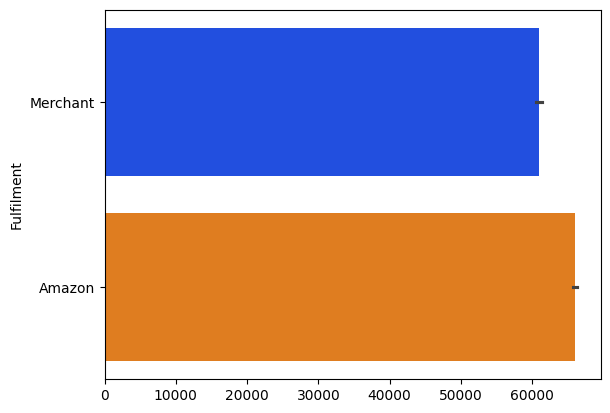

In [150]:
sns.barplot(df['Fulfilment'],palette="bright")

<Axes: xlabel='count', ylabel='Category'>

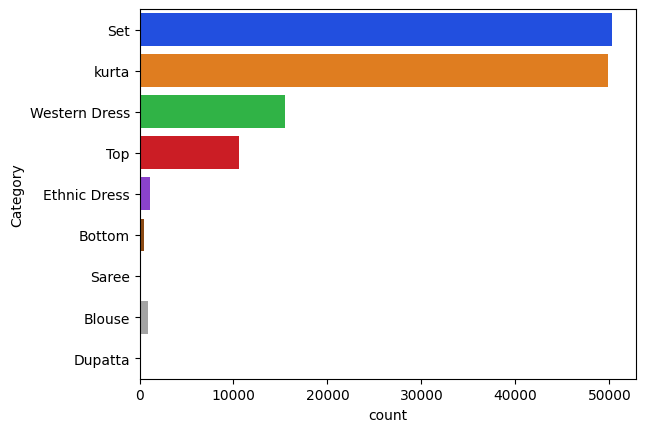

In [151]:
sns.countplot(df['Category'],palette="bright")

In [153]:
b2b_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Day of Week
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Saturday
241,241,407-5766340-7411567,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3440,JNE3440-KR-N-XS,kurta,XS,B09HMY3YLT,Shipped,1,INR,399.0,AHMEDABAD,Gujarat,380022.0,IN,True,Saturday
657,657,405-9201316-2870743,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0117,J0117-TP-XXL,Top,XXL,B08N4XHHCQ,Shipped,1,INR,518.0,MIHAN,MAHARASHTRA,441110.0,IN,True,Saturday
859,859,407-6114533-2816312,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3722,JNE3722-KR-L,kurta,L,B09BQBB47Y,Shipped,1,INR,280.0,MADIKERI,KARNATAKA,571201.0,IN,True,Saturday
860,860,407-6002733-2903540,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3480,JNE3480-KR-M,kurta,M,B099RJY1RY,Shipped,1,INR,249.0,MADIKERI,KARNATAKA,571201.0,IN,True,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127540,127540,171-4817567-5756337,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,NW004,NW004-TP-PJ-XXXL,Set,3XL,B0922T745K,Shipped,1,INR,475.0,MUMBAI,MAHARASHTRA,400056.0,IN,True,Wednesday
128096,128096,404-3844302-4907559,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,JNE2171,JNE2171-KR-437-M,kurta,M,B079WX69ZM,Shipped,1,INR,524.0,PANCHKULA,HARYANA,134109.0,IN,True,Wednesday
128265,128265,171-4327993-8297158,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,J0349,J0349-SET-S,Set,S,B099NJ4XRB,Shipped,1,INR,845.0,GURUGRAM,HARYANA,122101.0,IN,True,Wednesday
128478,128478,406-2175029-9825118,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0379,J0379-SKD-XS,Set,XS,B09M6VPHJY,Shipped,1,INR,1369.0,NEW DELHI,DELHI,110045.0,IN,True,Wednesday


<Axes: ylabel='Size'>

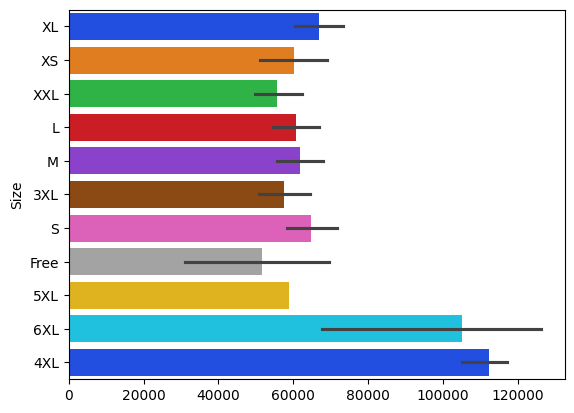

In [154]:
sns.barplot(b2b_df['Size'],palette="bright")

### <span style="color:Yellow"> This bar graph shows the count of sizes of dresses ordered in B2B sales

In [160]:
df['Day of Week'] = pd.Categorical(
    df['Day of Week'], 
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
    ordered=True
)

<Axes: xlabel='Day of Week', ylabel='Count'>

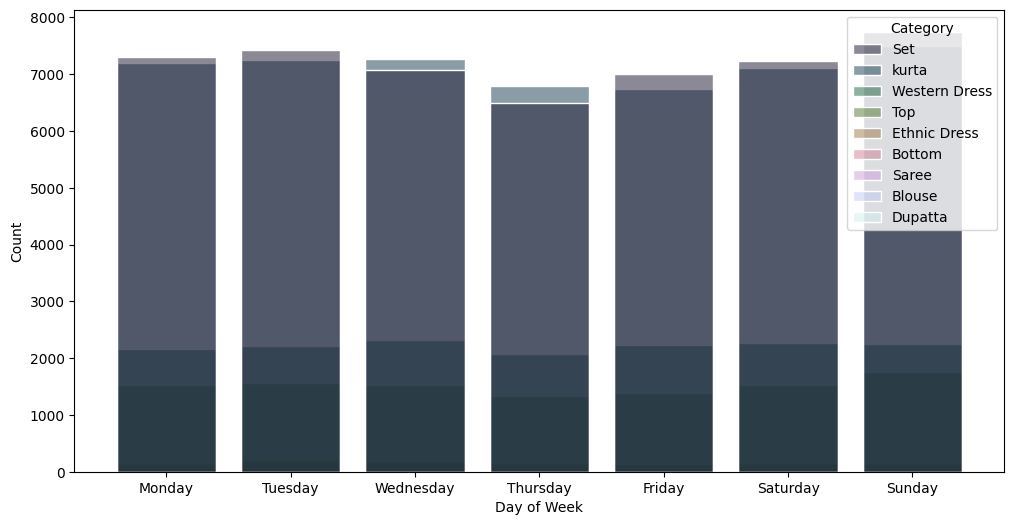

In [166]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='Day of Week',
    hue='Category',  # Assuming 'Qty' is a column in your datafram
    palette='cubehelix',  # Use a colorful palette
    edgecolor='white', # Add border to bars
    shrink = 0.8 
)